# Introdução ao Scikit-Learn

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1280px-Scikit_learn_logo_small.svg.png" width=200, height=100 alt="image info" />

O Scikit-Learn é uma biblioteca de aprendizado de máquina de código aberto para a linguagem de programação Python. De acordo com a sua [documentação](https://scikit-learn.org/stable/getting_started.html), o Scikit-Learn é uma biblioteca que suporta aprendizado supervisionado e não supervisionado, além de prover várias ferramentas para *model fitting*, pré-processamento de dados, seleção de modelos e avaliação, entre outras várias utilidades. Ela é projetada para interagir com as bibliotecas Python numéricas e científicas como *NumPy* e *SciPy*.

Para mais informações sobre a arquitetura da biblioteca, recomendo esse paper [API design for machine learning software: experiences from the scikit-learn project](https://arxiv.org/abs/1309.0238).

## Interfaces do `Scikit-learn`

O design da biblioteca é organizado em volta de [três APIs fundamentais (interfaces)](https://towardsdatascience.com/scikit-learn-design-principles-d1371958059b), pilares básicos do `Scikit-learn`: ***Estimator, Predictor*** e ***Transformer***.

### Estimator API 

Qualquer objeto que pode estimar alguns parâmetros com base em um conjunto de dados é chamado de *estimador* (por exemplo os modelos de Machine Learning como: Árvore de Decisão, KNN e Redes Neurais). A estimativa em si é realizada pelo método `fit()` e leva apenas um conjunto de dados como parâmetro (ou dois para algoritmos de aprendizado supervisionado; o segundo conjunto de dados contém os rótulos). Qualquer outro parâmetro necessário para orientar o processo de estimativa é considerado um hiperparâmetro e deve ser definido como uma variável de instância (geralmente por meio de um parâmetro do construtor).

### Predictor API 

Alguns estimadores são capazes de fazer previsões dado um conjunto de dados; eles são chamados de preditores. Por exemplo, um modelo de Rede Neural é um preditor: ele preve a classe de um exemplo dado os atributos daquele exemplo. Um preditor tem um método `predict()` que pega um conjunto de dados de novas instâncias e retorna um conjunto de dados de predições correspondentes. Ele também tem um método `score()` que mede a qualidade das previsões dado um conjunto de teste (e os rótulos correspondentes no caso de algoritmos de aprendizado supervisionado)

### Transformer API 

Alguns estimadores (como por exemplo o MinMaxScaler) também podem transformar um conjunto de dados; estes são chamados de transformadores. A API é bastante simples: a transformação é realizada pelo método `transform()` com o conjunto de dados a ser transformado como parâmetro. Ele retorna o conjunto de dados transformado. Esta transformação geralmente depende dos parâmetros aprendidos, como é o caso do MinMaxScaler que deve calcular qual o valor máximo e mínimo de cada coluna do conjunto de dados. Todos os transformadores também têm um método de conveniência chamado `fit_transform()` que é equivalente a chamar o método `fit()` e depois `transform()` (mas às vezes `fit_transform()` é otimizado e executa muito mais rápido).


## Exemplo de Aplicação

In [1]:
# Bibliotecas
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit

# Faz com que os resultados sejam mantidos sempre que executar esse jupyter notebook
SET_SEED = 42
np.random.seed(SET_SEED)

# Set parâmetros para figuras
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carrega o dataset
# Biblioteca necessária: pandas -> import pandas as pd

df = pd.read_csv('census.csv', sep = ',')
print(f'Número de exemplos: {df.shape[0]}')
print(f'Número de atributos: {df.shape[1]}')

Número de exemplos: 32561
Número de atributos: 15


**Atributos**

* **age:** Idade
* **workclass:** Classe de trabalho. Valores: (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
* **final-weight:** Peso final determinado pelo Census Org
* **education**: Educação do indivíduo. Valores: (10th, 11th, 12th, 1st-4th, 5th-6th, 7th-8th, 9th, Assoc-acdm, Assoc-voc, Bachelors, Doctorate, HS-grad, Masters, Preschool, Prof-school, Some-college)
* **education-num**: Educação do indivíduo representada por número de anos de educação
* **marital-status**: Estado civil. Valores: (Divorced, Married-AF-spouse, Married-civ-spouse, Married-spouse-absent, Never-married, Separated) 
* **occupation**: Profissão. Valores: (Adm-clerical, Armed-Forces, Craft-repair, Exec-managerial, Farming-fishing, Handlers-cleaners, Machine-op-inspct, Other-service, Priv-house-serv, Prof-specialty, Protective-serv, Sales, Tech-support, Transport-moving)
* **relationship**: Parentesco. Valores: (Husband, Not-in-family, Other-relative, Own-child, Unmarried, Wife)
* **race**: Raça. Valores: (Amer-Indian-Eskimo, Asian-Pac-Islander, Black, Other, White)
* **sex**: Sexo. Valores: (Female, Male)
* **capital-gain**: Ganho de capital
* **capital-loos**: Perda de capital
* **hour-per-week**: Média de horas de trabalho por semana
* **native-country**: País nativo. Valores: (Cambodia, Canada, China, Columbia, Cuba, Dominican-Republic, Ecuador, El-Salvador, England, France, Germany, Greece, Guatemala, Haiti, Holand-Netherlands, Honduras, Hong, Hungary, India, Iran, Ireland, Italy, Jamaica, Japan, Laos, Mexico, Nicaragua, Outlying-US(Guam-USVI-etc), Peru, Philippines, Poland, Portugal, Puerto-Rico, Scotland, South, Taiwan, Thailand, Trinadad&Tobago, United-States, Vietnam, Yugoslavia)
* **income**: renda. Valores: (<= 50K, > 50K)


In [3]:
# Ver as primeiras 15 linhas do Dataset
df.head(15)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Podemos observar que no dataset existe colunas com valores de '?', como por exemplo a coluna  `native-country` da linha 14. Isso indica ausência de valores e pode prejudicar o treinamento do classificador. 

Para a biblioteca `numpy` o valor '?' não é tratado como nulo, por isso devemos trocar os valores de '?' por `NaN`.

Quatidade de valores nulos por coluna: 

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

Quatidade de valores nulos por coluna após a troca de ? por NaN: 

age                  0
workclass         1836
final-weight         0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loos         0
hour-per-week        0
native-country     583
income               0
dtype: int64

Quantidade de linhas com valores nulos: 2399


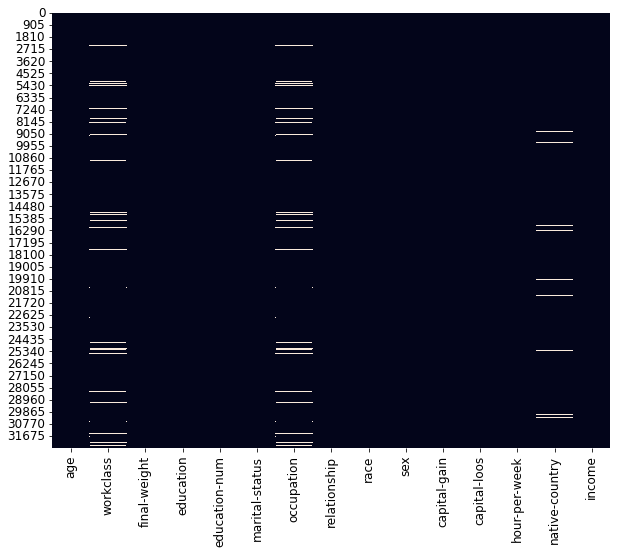

In [65]:
# Primeiro vamos ver se conseguimos mostrar a quantidade de valores nulos 
print(f'Quatidade de valores nulos por coluna: \n\n{df.isnull().sum()}')

# Trocar valor '?' por NaN
df = df.replace(' ?', np.NaN)

# Mostrar a quantidade de valores nulos por coluna após a troca 
print(f'\nQuatidade de valores nulos por coluna após a troca de ? por NaN: \n\n{df.isnull().sum()}')

print(f"\nQuantidade de linhas com valores nulos: {df.isna().any(axis=1).sum()}")

# Mostrar graficamente como os valores nulos estão presentes no Dataset
# Biblioteca necessária para plot:: matplotlib -> import matplotlib.pyplot as plt 
#                                :: seaborn-> import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False)


In [66]:
# Removendo as linhas com valores nulos do Dataset
df_clean = df.dropna()
print(f'Número de exemplos: {df_clean.shape[0]}')

Número de exemplos: 30162


Podemos remover a coluna `education` pois ela é reduntante, visto que já temos a coluna `education-num` que tem informação semelhante. Como os modelos de Machine Learning não aceitam dados categóricos, vamos manter a coluna que apresenta os valores em inteiro.

In [67]:
df_clean = df_clean.drop('education', axis=1)

In [68]:
df_clean.head()

,age,workclass,final-weight,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Criação de dados de validação e teste do modelo


<img src="https://i.stack.imgur.com/pXAfX.png" width=700, height=400 alt="image_heart" />


Porcentagem de dados de cada classe no Dataset

In [69]:
df_clean['income'].value_counts() / len(df_clean)

 <=50K    0.751078
 >50K     0.248922
Name: income, dtype: float64

É importante garantirmos que os conjuntos sejam criados mantendo a mesma porcentagem de cada classe que o Dataset original. Para isso iremos utilizar o objeto `StratifiedShuffleSplit` do subpacote `sklearn.model_selection`. O método `StratifiedShuffleSplit` irá embaralhar o conjunto de dados e dividir ele em  `n_splits` vezes. Porém, criando divisões preservando a mesma porcentagem para cada classe de destino como no conjunto completo. 

**OBS:** Para mais informações desse método pode se ler a [documentação dele.](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation). 

In [70]:
# Biblioteca necessária para criar conjunto de teste e validação com a mesma porcentagem de amostras
# :: sklearn -> from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SET_SEED)

# Dividir o conjunto de dados original em train_full e test 
for train_index, test_index in split.split(df_clean, df_clean['income']):
    df_train_full = df_clean.iloc[train_index]
    df_test = df_clean.iloc[test_index]
    
    
# Dividir o conjunto de dados train_full em train e valid 
for train_index, test_index in split.split(df_train_full, df_train_full['income']):
    df_train = df_train_full.iloc[train_index]
    df_valid = df_train_full.iloc[test_index]    

In [71]:
print(f'Número de exemplos de treino: {df_train.shape[0]}')
print('Porcentagem de cada classe no conjunto de treino: ')
print(df_train['income'].value_counts() / len(df_train))

print(f'\nNúmero de exemplos de validação: {df_valid.shape[0]}')
print(f'Porcentagem de cada classe no conjunto de validação: ')
print(df_valid['income'].value_counts() / len(df_valid))

print(f'\nNúmero de exemplos de teste: {df_test.shape[0]}')
print(f'Porcentagem de cada classe no conjunto de teste: ')
print(df_test['income'].value_counts() / len(df_test))


Número de exemplos de treino: 19303
Porcentagem de cada classe no conjunto de treino: 
 <=50K    0.751075
 >50K     0.248925
Name: income, dtype: float64

Número de exemplos de validação: 4826
Porcentagem de cada classe no conjunto de validação: 
 <=50K    0.75114
 >50K     0.24886
Name: income, dtype: float64

Número de exemplos de teste: 6033
Porcentagem de cada classe no conjunto de teste: 
 <=50K    0.751036
 >50K     0.248964
Name: income, dtype: float64


## Pré-Processamento dos dados

### Lidando com variáveis categóricas

É importante sabermos quais valores categóricos existem e o que cada um deles representam. Observando os atributos, os valores categóricos são: `workclass`, `marital-status`, `occupation`, `relationship`, `race`, `sex`, `native-country` e a classe do exemplos `income`. 

Os atributos `workclass`, `marital-status`, `occupation`, `relationship`, `race`, `sex` e `native-country` não apresentam uma ordenação entre os valores. Dessa forma, devemos transformar cada valor em um vetor binário, cada um com um elemento igual a 1 e os demais igual a 0. Sendo o tamanho do vetor igual ao número de valores diferentes.

Já o atributo `income`, que representa a classe dos dados, será processado utilizando outro método que lida com a variável quando ela representa a classe dos dados.

#### Conversão dos atributos: `workclass`,  `marital-status`,  `occupation`,  `relationship`,  `race`,  `sex`  e  `native-country`.

Para converter esses atributos em vetores binários vamos utilizar o objeto `OneHotEncoder` presente nano subpacote `sklearn.preprocessing`. Cada valor será representado como um vetor binário, onde cada um contém um elemento igual a 1 e os demais igual a 0. Como o exemplo abaixo:

<img src="https://miro.medium.com/max/1400/1*ggtP4a5YaRx6l09KQaYOnw.png" width=900, height=300 alt="image" />


In [11]:
# Definimos quais são as colunas que vamos converter
categorical_attribs = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Cria um dataset somente com os atributos categóricos
df_categorical = df_train[categorical_attribs]
df_categorical.head()

,workclass,marital-status,occupation,relationship,race,sex,native-country
8630,Private,Never-married,Sales,Own-child,White,Male,United-States
20942,Private,Separated,Prof-specialty,Unmarried,Black,Female,United-States
9332,Private,Never-married,Machine-op-inspct,Not-in-family,White,Male,United-States
20432,Private,Married-civ-spouse,Tech-support,Husband,White,Male,United-States
21151,Self-emp-inc,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States


In [12]:
# Biblioteca necessária para fazer a transformação: 
# :: sklearn -> from sklearn.preprocessing import OneHotEncoder

# Instância o objeto para transformar os atributos 
encoder = OneHotEncoder()

# Realizar a transformação
df_OneHotEnconder = encoder.fit_transform(df_categorical).toarray()

In [13]:
print(f'Quantidade de atributos antes da realizar a transformação: {df_categorical.shape[1]}')
print(f'Quantidade de atributos depois da realizar a transformação: {df_OneHotEnconder.shape[1]}')

Quantidade de atributos antes da realizar a transformação: 7
Quantidade de atributos depois da realizar a transformação: 82


Podemos visualizar os valores de cada coluna

In [14]:
encoder.categories_

[array([' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
        ' Self-emp-not-inc', ' State-gov', ' Without-pay'], dtype=object),
 array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array([' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving'], dtype=object),
 array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
        ' Unmarried', ' Wife'], dtype=object),
 array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
        ' White'], dtype=object),
 array([' Female', ' Male'], dtype=object),
 array([' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
        ' Dominican-Republic', ' Ecuador

Podemos observar que a primeira coluna contém 7 valores diferentes.

In [15]:
encoder.categories_[0]

array([' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay'], dtype=object)

In [16]:
# Mostrando o primeiro exemplo da base de dados após a conversão
df_OneHotEnconder[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

Se a primeira coluna contém 7 valores diferentes, os primeiros 7 elementos do array acima se refere a um determinado valor após a codificação da primeira coluna.

In [17]:
# Mostrando os 7 primeiros valores do primeiro exemplo da base de dados após a conversão
df_OneHotEnconder[0][0:7]

array([0., 0., 1., 0., 0., 0., 0.])

A codificação dos valores para um vetor binário segue a ordem que é apresentado cada valor quando chamamos a função `encoder.categories_`. Logo, o elemento acima representa o valor `Private` da coluna `workclass`. Pois, seguindo o que é apresentado abaixo: 

array([' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
        ' Self-emp-not-inc', ' State-gov', ' Without-pay'], dtype=object)
       
O valor `Private` está na posição 3.

Para confirmarmos isso, podemos mostrar quais são os valores do primeiro exemplo da base de dados antes da conversão.

In [18]:
df_categorical.iloc[0, ]

workclass                Private
marital-status     Never-married
occupation                 Sales
relationship           Own-child
race                       White
sex                         Male
native-country     United-States
Name: 8630, dtype: object

In [19]:
# Mostrar como ficou o dataframe após a conversão
pd.DataFrame(df_OneHotEnconder)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19298,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19300,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19301,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**OBS:** Podemos observar que foi gerado uma grande quantidade de novas colunas, nas quais a maioria tem valor 0. Isso ocorre quando existe atributos categóricos com um grande número de valores diferentes, como é o caso do atributo `native-country` que tem 41 valores diferentes. Para atributos assim, a técnica de One-Hot Encoding resultará em muitas entradas para o classificador, isso pode afetar o tempo de treinamento e a performance. Portanto, é recomendável testar o modelo e se for necessário encontrar outras alternativas para lidar com esses dados.  

#### Lidando com variáveis categóricas que apresentam ordenação .

Para lidar com variáveis categóricas que apresenta uma ordenação entre os valores, é recomendado transformar os valores em um número inteiro e manter a ordenação entre eles. Para converter esses atributos em valores inteiros mantendo a relação de ordem entre eles, podemos utilizar o objeto `OrdinalEncoder` presente no subpacote  `sklearn.preprocessing`. Cada valor será representado como um valor numérico, onde será seguido uma ordem entre eles. Como o exemplo abaixo:

<img src="https://miro.medium.com/max/654/1*NUzgzszTdpLPZpeKPPf0kQ.png" width=500, height=200 alt="image" />

Podemos observar pelo exemplo acima que os valores `Poor`, `Good`, `Very Good` e `Excellent` apresentam uma ordem, sendo que o valor `Poor` e `Good` são mais próximos do que os valores `Poor` e `Excellent`. Logo, em atributos assim devemos manter essa relação de ordem. 

Para realizar a conversão desse atributos podemos seguir os mesmos passos acima.

Exemplo da aplicação:

In [20]:
# Biblioteca necessária para fazer a transformação: 
# sklearn -> from sklearn.preprocessing import OrdinalEncoder

# Instância o objeto para transformar os atributos 
# encoder = OrdinalEncoder()

# Realizar a transformação
# df_ordinalEncoder = encoder.fit_transform(df_ordinal)

### Transformação as variáveis numéricas

Podemos escolher duas técnicas para transformar os dados. As duas tem o mesmo objetivo: transformar todas as variáveis na mesma ordem de grandeza. A diferença é que padronizar as variáveis irá resultar em uma média igual a 0 e um desvio padrão igual a 1. Já normalizar tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1.

Padronizar os dados normalmente é feito usando a fórmula z-score: Utilizar o objeto `StandardScaler()`.

$ z = \frac{x - u}{\sigma}$


Normalizar os dados usando Min-Max: Utilizar o objeto `MinMaxScaler()`.

$x' = \frac{X - X_{min}}{X_{max} - X_{min}}$

**OBS:** A escolha de qual técnica será utilizada vai depender do objetivo de cada aplicação, porém não existe uma técnica melhor que a outra e devemos testar para ver qual obtém melhores resultados.

Vamos utilizar a normalizaçnao dos dados.  Para realizar a normalizaçnao vamos utilizar o objeto `MinMaxScaler` presente no subpacote `sklearn.preprocessing`.

In [72]:
# Cria um dataset somente com os atributos numéricos
df_num = df_train.drop(categorical_attribs, axis=1)
df_num = df_num.drop('income', axis=1).reset_index(drop=True)

df_num.head()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
0,21,117210,10,0,0,45
1,44,214415,10,0,0,40
2,31,131568,5,0,0,40
3,59,127728,10,0,0,40
4,63,110610,6,0,0,50


In [73]:
# Biblioteca necessária para fazer a transformação: 
# sklearn -> from sklearn.preprocessing import MinMaxScaler

# Instância o objeto para padronizar os atributos 
scaler = MinMaxScaler()

# Realizar a transformação
df_norm = scaler.fit_transform(df_num)

In [74]:
pd.DataFrame(df_norm)

,0,1,2,3,4,5
0,0.054795,0.085290,0.600000,0.000000,0.0,0.448980
1,0.369863,0.165438,0.600000,0.000000,0.0,0.397959
2,0.191781,0.097129,0.266667,0.000000,0.0,0.397959
3,0.575342,0.093962,0.600000,0.000000,0.0,0.397959
4,0.630137,0.079848,0.333333,0.000000,0.0,0.500000
...,...,...,...,...,...,...
19298,0.191781,0.356809,0.600000,0.000000,0.0,0.397959
19299,0.547945,0.013408,0.533333,0.000000,0.0,0.397959
19300,0.164384,0.158789,0.333333,0.050131,0.0,0.397959
19301,0.410959,0.141140,0.600000,0.000000,0.0,0.346939


### Criando um novo Dataframe após o pré-processamento

In [24]:
# Criando um novo Dataframe com os dados após o processamento das variaveis categóricas e numéricas
df_train_new = pd.concat([pd.DataFrame(df_norm), pd.DataFrame(df_OneHotEnconder)], axis=1)

df_train_new.head()

,0,1,2,3,4,5,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,...,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,0.054795,0.085290,0.600000,0.0,0.0,0.448980,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.369863,0.165438,0.600000,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.191781,0.097129,0.266667,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.575342,0.093962,0.600000,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.630137,0.079848,0.333333,0.0,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Realizando a transformação dos valores que representam as classes dos dados

Para realizar essa transformação vamos utilizar o objeto `LabelEncoder` presente no subpacote `sklearn.preprocessing`. Aqui cada categoria recebe um valor de 0 a N, onde N é o número de categorias da variável. Não há relação ou ordem entre essas atribuições. Essa transformação é semelhante a usada com o objeto `OrdinalEncoder`, a diferença é que aqui não existe uma relação de ordem entre os elementos. 

In [25]:
# Criando um vetor com as classes dos exemplos
y_train = df_train['income']

y_train.head()

8630      <=50K
20942     <=50K
9332      <=50K
20432      >50K
21151     <=50K
Name: income, dtype: object

In [26]:
# Biblioteca necessária para fazer a transformação: 
# sklearn -> from sklearn.preprocessing import LabelEncoder

# Instância o objeto para transformar os valores 
label_encoder = LabelEncoder()

# Realizar a transformação
y_train = label_encoder.fit_transform(y_train)

In [27]:
pd.DataFrame(y_train)

,0
0,0
1,0
2,0
3,1
4,0
...,...
19298,0
19299,1
19300,0
19301,0


## Criando Pipeline

Como mostrado acima, o pré-processamento dos dados requer várias etapas diferentes. A sklearn oferece uma maneira de criarmos um pipeline para juntarmos alguns desses passos em apenas uma chamada de função, facilitando o pré-processamento dos dados e até mesmo incluir a definição do modelo de Machine Learning dentro do pipeline. Para fazer isso, devemos utilizar o subpacote `sklearn.pipeline`. 

Como nessa aplicaçnao temos dois tipos de pré-processamento dos dados, normalização das variáveis numéricas e transformação das variáveis categóricas, podemos utilizar um outro subpacote o `sklearn.compose` para importar o objeto `ColumnTransformer` e aplicar o pré-processamento adequado em cada coluna desejada e concatenar os resultados em um unico array. 

In [77]:
# Definimos quais são os nomes das variáveis numéricas
num_features =  list(df_clean.select_dtypes(exclude='object'))

# Definimos quais são os nomes das variáveis categóricas
cat_features = list(df_clean.select_dtypes(include='object'))
# Removendo o nome da última variável categórica que é o `income`. 
cat_features.pop()

# Criando um Pipeline para realizar a normalização das variáveis numéricas
numerical_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
])

# Criando um Pipeline para realizar a transformação das variáveis categóricas
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

# Criando o Pipeline final com o objeto ColumnTransformer e definindo qual pipeline será aplicado em cada coluna
full_pipeline = ColumnTransformer([
    ("num", numerical_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])


In [78]:
# Selecionando a classe dos dados 
y_train = df_train['income']
y_valid = df_valid['income']
y_test = df_test['income']

# Realizando a transformação dos atributos  
X_train = full_pipeline.fit_transform(df_train).toarray()

In [81]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
0,0.054795,0.085290,0.600000,0.0,0.0,0.448980,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.369863,0.165438,0.600000,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.191781,0.097129,0.266667,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.575342,0.093962,0.600000,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.630137,0.079848,0.333333,0.0,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Uma vez chamado o método `fit()` (no caso aqui foi chamado o método `fit()` e o `transform()` juntos -> `fit_transform()`) para o conjunto de dados, os parâmetros necessários para realizar a transformação dos dados já foi calculado com base no conjunto de treinamento. Desse modo, para realizar a transformação do conjunto de validação e teste devemos somente utilizar o método `transform()`.

In [79]:
X_valid = full_pipeline.transform(df_valid).toarray()
X_test = full_pipeline.transform(df_test).toarray()

In [82]:
# Realizando a transformação da classe 
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.transform(y_valid)
y_test = label_encoder.transform(y_test)

## Treinamento do modelo

Inicialmente devemos chamar objeto referente ao modelo de Machine Learning que queremos utilizar. Iremos utilizar uma Rede Neural Artificial do tipo Multilayer Perceptron. Dentro desse objeto existe vários parâmetros referente a arquitetura do modelo. Todos os parâmetros pode ser visto na [documentação oficial](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

In [83]:
# Biblioteca necessária para fazer o classificador: 
# sklearn -> from sklearn.neural_network import MLPClassifier

# Instância o modelo 
clf =  MLPClassifier(verbose=True, max_iter=1000, solver='adam', hidden_layer_sizes= 106, 
                     activation='relu')

# Realiza o treinamento do modelo
clf.fit(X_train, y_train)

Iteration 1, loss = 0.45916538
Iteration 2, loss = 0.37735748
Iteration 3, loss = 0.36343578
Iteration 4, loss = 0.35445564
Iteration 5, loss = 0.34682284
Iteration 6, loss = 0.34156302
Iteration 7, loss = 0.33689197
Iteration 8, loss = 0.33345633
Iteration 9, loss = 0.32986954
Iteration 10, loss = 0.32735819
Iteration 11, loss = 0.32613152
Iteration 12, loss = 0.32317029
Iteration 13, loss = 0.32206428
Iteration 14, loss = 0.32139889
Iteration 15, loss = 0.31908299
Iteration 16, loss = 0.31830353
Iteration 17, loss = 0.31699431
Iteration 18, loss = 0.31566626
Iteration 19, loss = 0.31502070
Iteration 20, loss = 0.31436067
Iteration 21, loss = 0.31328990
Iteration 22, loss = 0.31209167
Iteration 23, loss = 0.31266699
Iteration 24, loss = 0.31300137
Iteration 25, loss = 0.31057379
Iteration 26, loss = 0.31038346
Iteration 27, loss = 0.30882525
Iteration 28, loss = 0.30852689
Iteration 29, loss = 0.30930031
Iteration 30, loss = 0.30813486
Iteration 31, loss = 0.30668600
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=106, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

### Avaliando o modelo com conjunto de validação

A biblioteca Scikit-Learn oferece várias funções para avaliar os modelos de machine learning. Essas funções podem ser chamadas pelo subpacote sklearn.metrics. Todos as funções pertencentes ao subpacote `sklearn.metrics` pode ser visto neste [link](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [84]:
def evaluate_model(y_true, y_predict):
    from sklearn import metrics
    
    acc = metrics.accuracy_score(y_true, y_predict)
    precision = metrics.precision_score(y_true, y_predict)
    recall = metrics.recall_score(y_true, y_predict)
    f1 = metrics.f1_score(y_true, y_predict)
    conf_matrix = metrics.confusion_matrix(y_true, y_predict)
    

    
    print('Acurácia: {:.2f}'.format(acc))
    print('Precisão: {:.2f}'.format(precision))
    print('Recall: {:.2f}'.format(recall))
    print('F1_score: {:.2f}'.format(f1))
    print('\nMatriz de Confusão: \n', conf_matrix)

In [34]:
# Avaliando o modelo com conjunto de validação
# Chamamos a função predict() passando o conjunto de validação e ela irá retornar a previsão para cada dado
y_pred_valid = clf.predict(X_valid)

evaluate_model(y_valid, y_pred_valid)

Acurácia: 0.86
Precisão: 0.74
Recall: 0.65
F1_score: 0.69

Matriz de Confusão: 
 [[3347  278]
 [ 419  782]]


Podemos criar uma matriz de confusão mais visual utilizando as bibliotecas seaborn e matplotlib.

Text(30.0, 0.5, 'True')

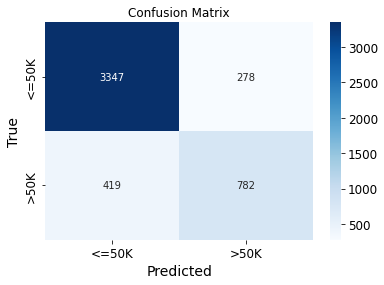

In [35]:
# Matriz de Confusão
labels = ['<=50K', '>50K']
conf_matrix = confusion_matrix(y_valid, y_pred_valid)
plt.title("Confusion Matrix")
df_cm = pd.DataFrame(conf_matrix, range(2), range(2))
ax = sns.heatmap(df_cm, annot=True,fmt='g',cmap ='Blues')# font size
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')

Podemos obter uma avaliação mais detalhada do modelo utilizando a função `classification_report` presente no subpacote `sklearn.metrics`.

In [36]:
from sklearn.metrics import  classification_report
print(classification_report(y_valid, y_pred_valid, target_names=labels))

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.91      3625
        >50K       0.74      0.65      0.69      1201

    accuracy                           0.86      4826
   macro avg       0.81      0.79      0.80      4826
weighted avg       0.85      0.86      0.85      4826



### Encontrar melhores hiperparâmetros do modelo

Todos os modelo de Machine Learning possuem parâmetros que devem ser definidos durante a criação do modelo. Porém, determinar quais são os melhores parâmetros não é uma tarefa trivial. A biblioteca Scikit-Learn oferece dois métodos de realizar uma busca automática pelos melhores parâmetros de um modelo. Os dois métodos mais comuns são o `GridSearchCV()` e o `RandomizedSearchCV()`. A ideia de ambos é parecida: buscar o melhor conjunto de parâmetros para um modelo de Machine Learning utilizando cross-validation. O `GridSearchCV()` faz um busca exaustiva de acordo com uma lista de parâmetros especificados e o `RandomizedSearchCV()` faz a mesma busca mas amostrando os valores dos parâmetros através de uma distribuição informada.

Aqui iremos ultilizar o `GridSearchCV()` e informar o conjunto de parâmetros que deve ser testado. 

In [37]:
from sklearn.model_selection import GridSearchCV

# Vamos passar como parâmetros para serem testados os seguintes:
# -> o número de neurônios na camada oculta (hidden_layer_sizes)
# -> o método para a otimização dos pesos (solver)
# -> o tipo de função de ativação na camada oculta (activation)
param_grid = [{'hidden_layer_sizes': [2, 54, 106, 209], 'solver': ['adam', 'sgd'], 
               'activation': ['logistic', 'tanh', 'relu']}]

mlp = MLPClassifier()

Depois devemos instânciar o objeto `GridSearchCV` definindo qual valor de `cv: cross-validation` será utilizado, e qual `scoring` (métrica) será utilizado para definir os melhores parâmetros, aqui iremos utilizar `accuracy` visto que os dados estão desbalanceados.

In [38]:
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [40]:
# Printa os melhores parâmetros que foi achado
grid_search.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [41]:
# Printa a média das acurácias em cada validação cruzada que foi realizada para cada conjunto de parâmetros testado
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(f'Acurácia média: {mean_score}', params)

Acurácia média: 0.845050102459429 {'activation': 'logistic', 'hidden_layer_sizes': 2, 'solver': 'adam'}
Acurácia média: 0.8121014985781825 {'activation': 'logistic', 'hidden_layer_sizes': 2, 'solver': 'sgd'}
Acurácia média: 0.84598255707064 {'activation': 'logistic', 'hidden_layer_sizes': 54, 'solver': 'adam'}
Acurácia média: 0.8173339882148172 {'activation': 'logistic', 'hidden_layer_sizes': 54, 'solver': 'sgd'}
Acurácia média: 0.8452573026666291 {'activation': 'logistic', 'hidden_layer_sizes': 106, 'solver': 'adam'}
Acurácia média: 0.8182146561939309 {'activation': 'logistic', 'hidden_layer_sizes': 106, 'solver': 'sgd'}
Acurácia média: 0.8446875691953413 {'activation': 'logistic', 'hidden_layer_sizes': 209, 'solver': 'adam'}
Acurácia média: 0.8172819734477766 {'activation': 'logistic', 'hidden_layer_sizes': 209, 'solver': 'sgd'}
Acurácia média: 0.8458272240137525 {'activation': 'tanh', 'hidden_layer_sizes': 2, 'solver': 'adam'}
Acurácia média: 0.8351030968647549 {'activation': 'tanh'

## Teste do Modelo

Após encontrar os melhores parâmetros para o modelo podemos testar o modelo com o conjunto de teste.

In [85]:
# Avaliando o modelo para o conjunto de teste
y_pred_test = clf.predict(X_test)

evaluate_model(y_test, y_pred_test)

Acurácia: 0.84
Precisão: 0.70
Recall: 0.65
F1_score: 0.67

Matriz de Confusão: 
 [[4107  424]
 [ 524  978]]


Text(30.0, 0.5, 'True')

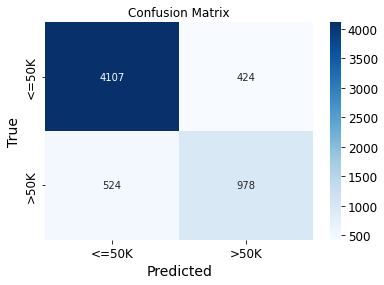

In [86]:
# Matriz de Confusão
labels = ['<=50K', '>50K']
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.title("Confusion Matrix")
df_cm = pd.DataFrame(conf_matrix, range(2), range(2))
ax = sns.heatmap(df_cm, annot=True,fmt='g',cmap ='Blues')# font size
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [87]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred_test, target_names=labels))

              precision    recall  f1-score   support

       <=50K       0.89      0.91      0.90      4531
        >50K       0.70      0.65      0.67      1502

    accuracy                           0.84      6033
   macro avg       0.79      0.78      0.79      6033
weighted avg       0.84      0.84      0.84      6033



## Validação Cruzada 

Existe várias formas de realizar a validação cruzada utilizando a biblioteca Scikit-Learn. Todas elas podem ser vistas [aqui](https://scikit-learn.org/stable/modules/cross_validation.html).

A maneira mais simples de usar a validação cruzada é chamar a função auxiliar `cross_val_score` para o estimador e no conjunto de dados.

### Usando `cross_val_score`.

In [45]:
# Para a validação cruzada podemos utilizar o conjunto de dados inteiro sem a necessidade de divisão em treino e teste
df_clean.head()

,age,workclass,final-weight,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [46]:
# Obter a classe dos dados
Y = df_clean['income']

# Obter somente os atributos
df_X = df_clean.drop('income', axis=1)

In [47]:
# Aplicar o Pipeline criado no conjunto de dados
X = full_pipeline.fit_transform(df_X).toarray()

# Realizar o LabelEncoder na classe
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [48]:
print(f'Exemplo 1:\n {X[1]}')

Exemplo 1:
 [0.45205479 0.04727738 0.8        0.         0.         0.12244898
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.        ]


In [49]:
print(f'Clase do exemplo 1:\n {Y[1]}')

Clase do exemplo 1:
 0


Para utilizar o método `cross_val_score` devemos passar como parâmtros o modelo de classificação usado, o conjunto de dados X e a classe Y e o número de fold que iremos utilizar na validação cruzada. Além disso, podemos passar o parâmetro `scoring` que irá definir quais métricas queremos calcular em cada interação.

In [50]:
from sklearn.model_selection import cross_val_score

mlp = MLPClassifier(max_iter=1000, solver='adam', hidden_layer_sizes= 106, 
                     activation='relu')

scores = cross_val_score(mlp, X, Y, cv=5, scoring='accuracy')

O método irá retornar todas as acurácias obtidas em cada fold da validação cruzada.

In [51]:
print(f'Acurácias: {scores}')

Acurácias: [0.84286425 0.83540527 0.84101459 0.85013263 0.85344828]


### Usando cross_val_score

Outra forma de realizar a validação cruzada é gerando índices que podem ser usados para gerar divisões de conjuntos de dados de acordo com diferentes estratégias de validação cruzada. Essa estratégia é mais ampla e pode ser usada quando desejamos obter algumas métricas mais detalhadas do modelo em cada fold. 

Um dos métodos para realizar esse tipo de validação cruzada é utilizar o objeto `StratifiedKFold` presente no subpacote `sklearn.model_selection`. Esse método é uma variação de k-fold que retorna os dados estratificados: cada conjunto contém aproximadamente a mesma porcentagem de amostras de cada classe de destino que o conjunto original.

O `StratifiedKFold` é semelhante ao método `StratifiedShuffleSplit` utilizado no início para gerar os conjuntos de validação e teste. A única diferença é que o método `StratifiedShuffleSplit` embaralha os dados sempre que irá realizar a divisão, já o método `StratifiedKFold` só embaralha os dados uma única vez.

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 

# Quando chamado o objeto devemos informar a quantidade de divisões que queremos
skfolds = StratifiedKFold(n_splits=10)

mlp = MLPClassifier(max_iter=1000, solver='adam', hidden_layer_sizes= 106, 
                     activation='relu')

i = 0
for train_index, test_index  in skfolds.split(X, Y):
    clone_mlp = clone(mlp)
    X_train = X[train_index]
    y_train = Y[train_index]
    X_test = X[test_index]
    y_test = Y[test_index]
    
    clone_mlp.fit(X_train, y_train)
    y_pred = clone_mlp.predict(X_test)
    
    print(f'\nMétricas obtidas no Fold {i}: \n')
    i += 1 
    evaluate_model(y_test, y_pred)


Métricas obtidas no Fold 0: 

Acurácia: 0.84
Precisão: 0.70
Recall: 0.61
F1_score: 0.65

Matriz de Confusão: 
 [[2071  195]
 [ 294  457]]

Métricas obtidas no Fold 1: 

Acurácia: 0.85
Precisão: 0.71
Recall: 0.66
F1_score: 0.68

Matriz de Confusão: 
 [[2059  207]
 [ 253  498]]

Métricas obtidas no Fold 2: 

Acurácia: 0.84
Precisão: 0.69
Recall: 0.68
F1_score: 0.69

Matriz de Confusão: 
 [[2034  232]
 [ 238  512]]

Métricas obtidas no Fold 3: 

Acurácia: 0.83
Precisão: 0.67
Recall: 0.65
F1_score: 0.66

Matriz de Confusão: 
 [[2026  240]
 [ 260  490]]

Métricas obtidas no Fold 4: 

Acurácia: 0.84
Precisão: 0.69
Recall: 0.67
F1_score: 0.68

Matriz de Confusão: 
 [[2035  230]
 [ 248  503]]

Métricas obtidas no Fold 5: 

Acurácia: 0.86
Precisão: 0.76
Recall: 0.60
F1_score: 0.68

Matriz de Confusão: 
 [[2125  140]
 [ 297  454]]

Métricas obtidas no Fold 6: 

Acurácia: 0.84
Precisão: 0.70
Recall: 0.62
F1_score: 0.66

Matriz de Confusão: 
 [[2070  195]
 [ 285  466]]

Métricas obtidas no Fold 7

## Lidando com os dados desbalanceados

Existe algumas formas de lidar com um conjunto de dados desbalanceados:

**Undersampling:** Esse método consiste em reduzir de forma aleatória os exemplos da classe majoritária. Para realizar essa técnica podemos utilizar o algoritmo `NearMiss` que consiste em reduzir de forma aleatória os exemplos da classe majoritária, porém ele seleciona os exemplos com base na distância. Esse método faz com que quando instâncias das duas classes estão muito próximas umas das outras, é removido as instâncias da classe majoritária para obter uma maior separabilidade entre as classes.

**Oversampling:** Esse método consiste em replicar dados aleatórios da classe minoritária. Para realizar essa técnica podemos utilizar o método `Smote` que consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos. Esse método calcula quais são os vizinhos mais próximos e as características desses vizinhos para criar novos dados. Se o número de dados gerados for muito grande podemos ter um overfiting.
**OBS:** Como esse método duplica os dados já existentes ele está propício a dar overfitting.



In [53]:
# Primeiro vamos ver a porcentagem de dados de cada classe
df_clean['income'].value_counts() / len(df_clean)

 <=50K    0.751078
 >50K     0.248922
Name: income, dtype: float64

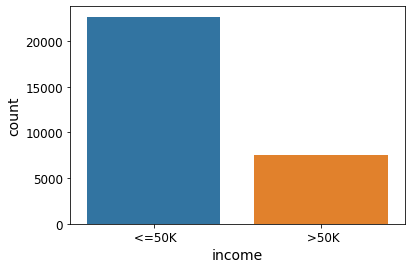

In [54]:
ax = sns.countplot(x="income", data=df_clean)

In [55]:
# Obter a classe dos dados
Y = df_clean['income']

# Obter somente os atributos
df_X = df_clean.drop('income', axis=1)

# Aplicar o Pipeline criado no conjunto de dados
X = full_pipeline.fit_transform(df_X).toarray()

# Realizar o LabelEncoder na classe
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

Para aplicar as técnicas a biblioteca [imblearn-learn](https://pypi.org/project/imbalanced-learn/) deve ser instalada. 

###  Aplicando a técnica `NearMiss`

In [56]:
from imblearn.under_sampling import NearMiss

In [57]:
# Devemos instânciar o objeto 
# Alguns parâmetros pode ser configurado
nr = NearMiss()

# Aplicar a técnica 
X_new, y_new = nr.fit_resample(X, Y)

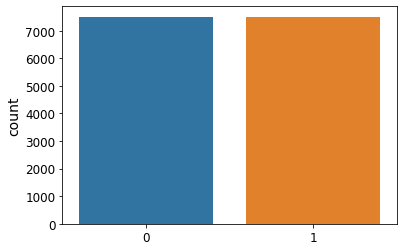

In [58]:
ax = sns.countplot(x=y_new)

### Aplicando a técnica  `Smote` (Synthetic Minority Over-sampling Technique)

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
# Devemos instânciar o objeto 
# Essa técnica possui o parâmetro sampling_strategy que irá definir qual a porcentagem de dados sintéticos
# iremos gerar.
smt = SMOTE(sampling_strategy=0.7) # irá gerar 70% de dados sintéticos

# Aplicar a técnica 
X_new, y_new = smt.fit_resample(X, Y)

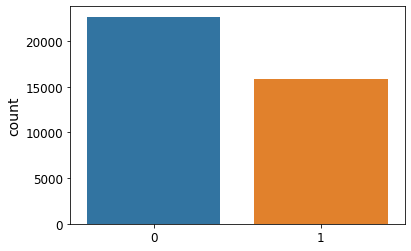

In [61]:
ax = sns.countplot(x=y_new)

## Referências

Livro: Hands Machine Learning with Scikit-Learn, Keras & TensorFlow (2ed).

Documentação oficial: [Scikit-learn](https://scikit-learn.org/stable/index.html).